In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
# memproses dataset
df = pd.read_csv("Instagram data.csv", encoding="latin1")
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [17]:
df.shape

(119, 13)

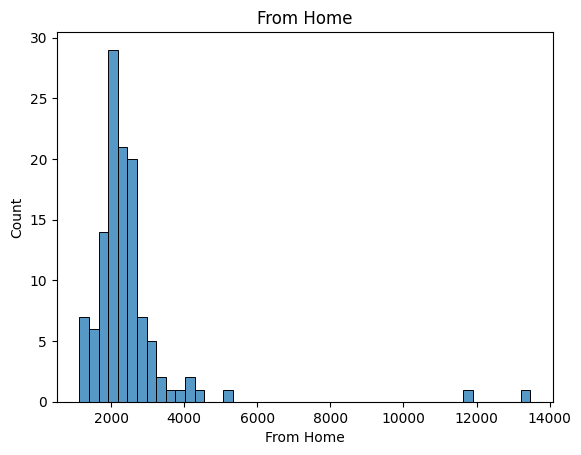

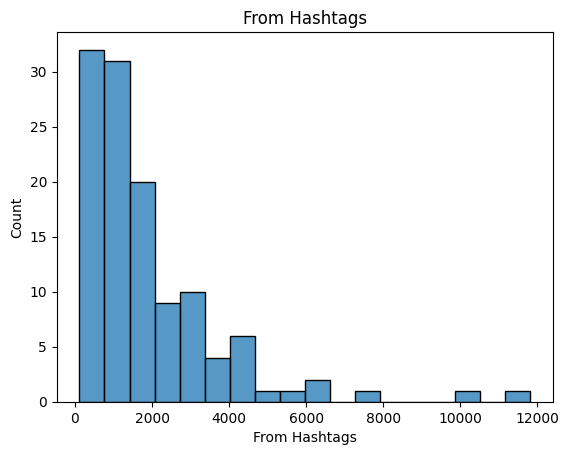

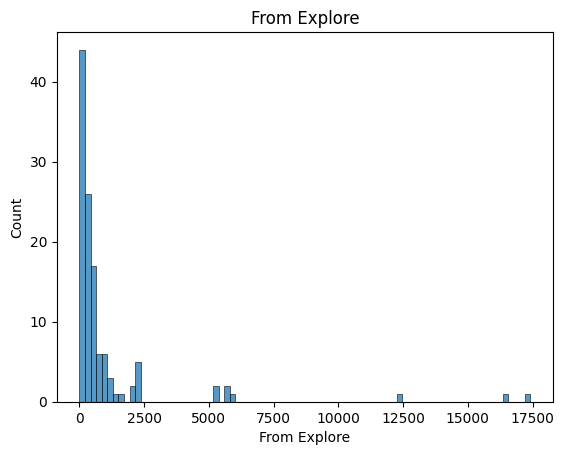

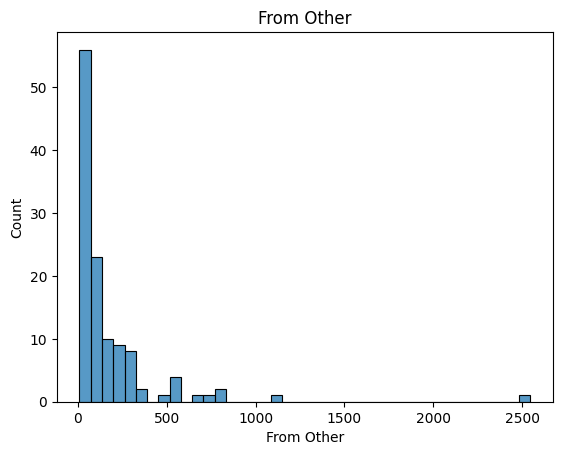

In [19]:

dist_arr = ["From Home", "From Hashtags", "From Explore", "From Other"]
for i in range(len(dist_arr)):
    plt.figure()
    plt.title(dist_arr[i])
    sns.histplot(df[dist_arr[i]])
    plt.show()

In [20]:
# Menghitung jumlah total untuk sumber distribusi
from_home = df["From Home"].sum()
from_hashtags = df["From Hashtags"].sum()
from_explore = df["From Explore"].sum()
from_other = df["From Other"].sum()

In [22]:
# Menghapus kolom yang tidak relevan untuk pemodelan
df = df.drop(["From Home", "From Hashtags", "From Explore", "From Other", "Caption", "Hashtags"], axis=1)

In [24]:
# Memisahkan fitur (X) dan variabel target (y)
X = df.drop("Impressions", axis=1)
y = df["Impressions"]

In [25]:
# Membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [26]:
# Mengimpor model Passive Aggressive Regressor
from sklearn.linear_model import PassiveAggressiveRegressor

In [27]:
 # Inisialisasi dan melatih model
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train)

PassiveAggressiveRegressor()

In [28]:
# Mengevaluasi model pada set pengujian
score = par.score(X_test, y_test)
print(f"R^2 Score: {score}")

R^2 Score: -0.14568240535125998


In [29]:
# Membuat prediksi pada set pengujian
y_pred = par.predict(X_test)

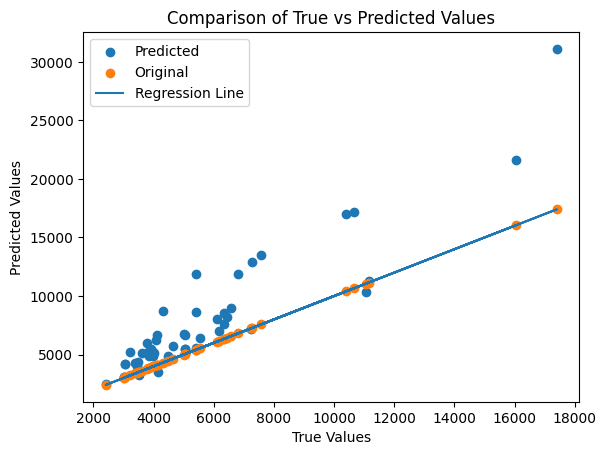

In [30]:
# Membuat plot sebar dari nilai prediksi vs nilai asli
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test)
plt.plot(y_test, y_test)
plt.legend(["Predicted", "Original", "Regression Line"])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of True vs Predicted Values')
plt.show()

In [31]:
# Mensimulasikan variasi Monte Carlo untuk menilai kekokohan model
num_simulations = 100
results = []

for _ in range(num_simulations):
    X_test_sample = X_test.sample(frac=1.0, replace=True)  # Resample with replacement
    y_pred_sample = par.predict(X_test_sample)
    score = par.score(X_test_sample, y_test)
    results.append(score)

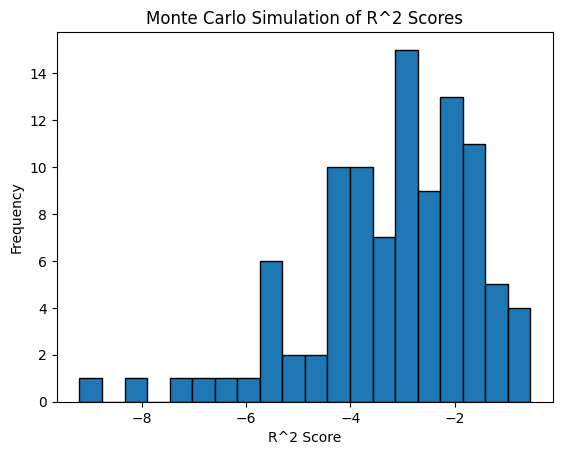

In [32]:
# Membuat plot distribusi skor dari simulasi Monte Carlo
plt.figure()
plt.hist(results, bins=20, edgecolor='black')
plt.xlabel('R^2 Score')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of R^2 Scores')
plt.show()